In [ ]:
import tensorflow as tf

In [ ]:
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization,GlobalMaxPool2D,LeakyReLU,SpatialDropout2D, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import Adam,AdamW

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np
import seaborn as sns
import os

In [ ]:

import zipfile

zip_path = "/content/archive.zip"
extract_path = "/content/Emotion"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import os

base_dir = "/content/Emotion"
for root, dirs, files in os.walk(base_dir):
    for name in dirs:
        print("📁", os.path.join(root, name))

📁 /content/Emotion/test
📁 /content/Emotion/train
📁 /content/Emotion/test/disgusted
📁 /content/Emotion/test/fearful
📁 /content/Emotion/test/surprised
📁 /content/Emotion/test/sad
📁 /content/Emotion/test/angry
📁 /content/Emotion/test/happy
📁 /content/Emotion/test/neutral
📁 /content/Emotion/train/disgusted
📁 /content/Emotion/train/fearful
📁 /content/Emotion/train/surprised
📁 /content/Emotion/train/sad
📁 /content/Emotion/train/angry
📁 /content/Emotion/train/happy
📁 /content/Emotion/train/neutral


In [ ]:
train_path = "/content/Emotion/train"
test_path = "/content/Emotion/test"

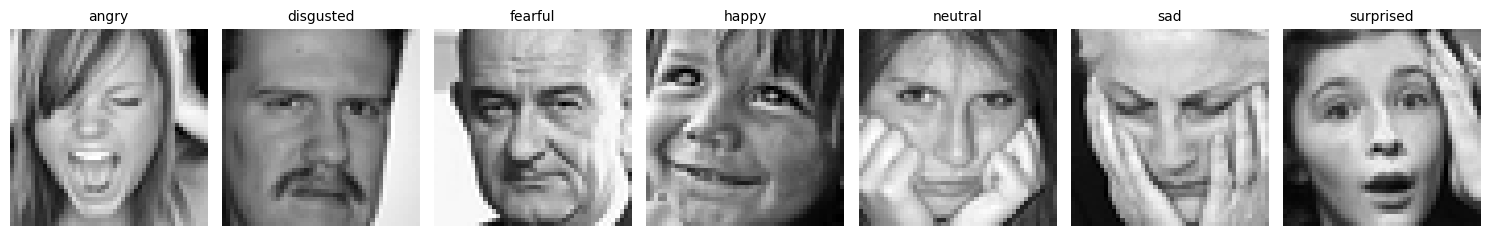

In [ ]:

# Path to your training dataset
base_path = "/content/Emotion/train"
class_names = sorted(os.listdir(base_path))  # Get class names

plt.figure(figsize=(15, 5))

for idx, class_name in enumerate(class_names):
    class_dir = os.path.join(base_path, class_name)
    image_files = os.listdir(class_dir)

    if not image_files:
        continue  # skip if folder is empty

    img_path = os.path.join(class_dir, image_files[0])  # 1st image from class
    img = load_img(img_path, target_size=(48, 48), color_mode='grayscale')
    img_array = img_to_array(img)

    plt.subplot(1, 7, idx + 1)
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.title(class_name, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
model = Sequential()

# model Block 1
model.add(Conv2D(64, (3,3), padding='same', activation='relu',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

# model Block 2
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

#model Block 3
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# model Block 4
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

# model Block 5
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
# model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optput = Adam(learning_rate=0.0003)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1)
model.compile(optimizer=optput, loss=loss, metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 4,049,671 (15.45 MB)

 Trainable params: 4,046,215 (15.44 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=20, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

In [ ]:

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(48, 48),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(48, 48),
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

labels = train_generator.classes
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(labels),
                                     y=labels)
class_weights_dict = dict(enumerate(class_weights))

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
history=model.fit(train_generator,validation_data=test_generator,epochs=100,class_weight=class_weights_dict,callbacks=callbacks)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 53s 44ms/step - accuracy: 0.1722 - loss: 2.3551 - val_accuracy: 0.2583 - val_loss: 2.0358 - learning_rate: 3.0000e-04
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.2292 - loss: 2.0918 - val_accuracy: 0.3831 - val_loss: 1.7139 - learning_rate: 3.0000e-04
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 29s 32ms/step - accuracy: 0.3013 - loss: 1.9028 - val_accuracy: 0.2223 - val_loss: 2.0871 - learning_rate: 3.0000e-04
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 47s 39ms/step - accuracy: 0.3773 - loss: 1.7440 - val_accuracy: 0.4329 - val_loss: 1.6299 - learning_rate: 3.0000e-04
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 38s 35ms/step - accuracy: 0.4152 - loss: 1.6596 - val_accuracy: 0.4939 - val_loss: 1.4971 - learning_rate: 3.0000e-04
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 31s 34ms/step - accuracy: 0.4601 - loss: 1.5675 - val_accuracy: 0.4850 - val_loss: 1.5144 - learning_rate: 3.0000e-04
Epoch 7/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 33s 37ms/step - a

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# load & preprocess
img = load_img(r'/content/Emotion/train/happy/im10.png', target_size=(48, 48), color_mode='grayscale')
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)          # (1, 48, 48, 1)

# predict
probs = model.predict(img_array)                         # shape (1, 7)
idx = np.argmax(probs, axis=1)[0]                  # highest‑probability column
label = {v:k for k,v in train_generator.class_indices.items()}[idx]

print(f"Predicted index : {idx}")
print(f"Predicted label : {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted index : 3
Predicted label : happy


In [ ]:

# Predict on test data
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Step 2: Get true labels
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


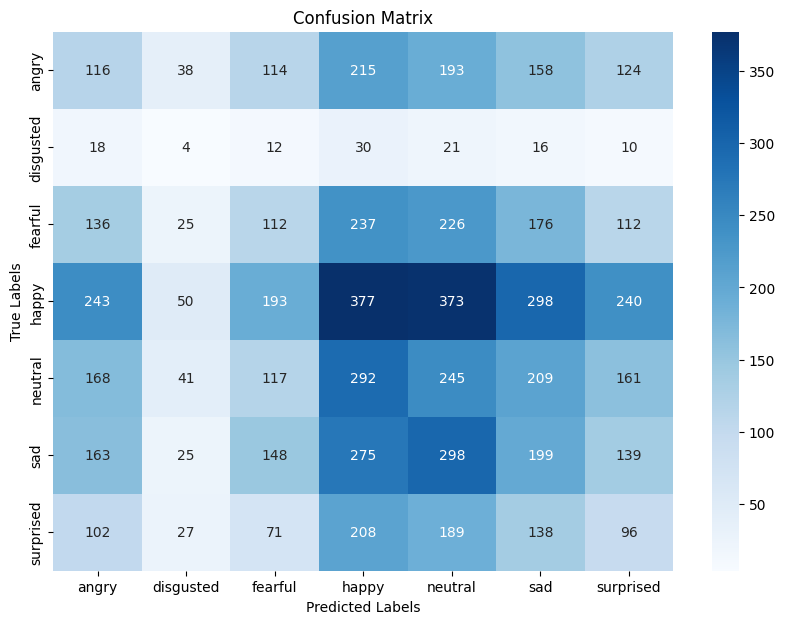

In [ ]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

# Step 4: Plot it
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

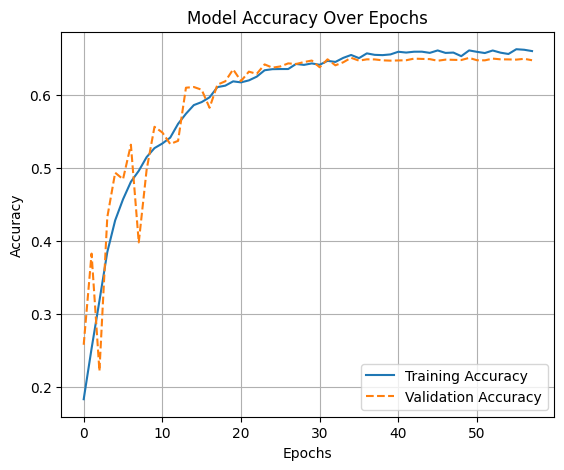

In [ ]:


# Accuracy plot
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)


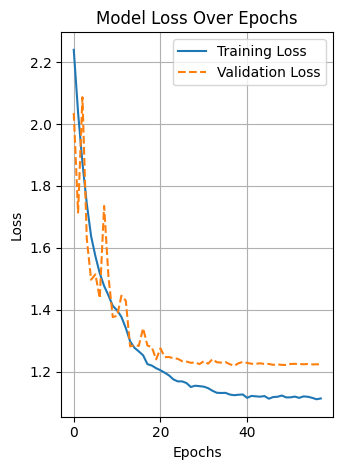

In [ ]:
# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
model.save('Emotion_model.h5')


In [ ]:
from google.colab import files
files.download('Emotion_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>